In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../library/')
from frustration_graph import *
import pickle
import os
import copy

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [14]:
res_path = "../../../Results/Ising_Frustrated/Open/"

L = 20
ratios = np.arange(-1., 0, 0.05)

qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [12]:
ratios.size

50

## Frustrated Ising without Periodic Conditions

In [15]:
filename = f"/0/{ratios.size}_ratio_points.pickle"

if not os.path.isfile(res_path + filename):
    results = []

    for const in ratios:
        bqm = bqm_frustration(L, const)
        sampleset = sampler.sample(bqm, num_reads=500) #chain_strenght=5
        
        results.append(sampleset)
    
    Magnetizations = []
    Frequencies = []
    Energies = []

    for result in results: 
        M, f, E = [], [], []
        for record in result.record:
            M_mean = np.abs(record[0].mean())
            M.append(M_mean)
            f.append(record[2])
            E.append(record[1])
        Magnetizations.append(M)
        Frequencies.append(f)
        Energies.append(E)

    with open(res_path + filename, "wb") as file:
        pickle.dump([Magnetizations, Energies, Frequencies] , file)
else:
    with open(res_path + filename, "rb") as file:
        Magnetizations, Energies, Frequencies = pickle.load(file)

In [ ]:
filename = f"/1/{ratios.size}_ratio_points.pickle"

if not os.path.isfile(res_path + filename):
    results = []

    for Js in [(1, -10), (1, -2), (9, -10)]:
        j2, j1 = Js    
        bqm = bqm_frustration1(L, j1, j2)
        sampleset = sampler.sample(bqm, num_reads=500) #chain_strenght=5
        
        results.append(sampleset)
    
    Magnetizations = []
    Frequencies = []
    Energies = []

    for result in results: 
        M, f, E = [], [], []
        for record in result.record:
            M_mean = np.abs(record[0].mean())
            M.append(M_mean)
            f.append(record[2])
            E.append(record[1])
        Magnetizations.append(M)
        Frequencies.append(f)
        Energies.append(E)

    with open(res_path + filename, "wb") as file:
        pickle.dump([Magnetizations, Energies, Frequencies] , file)
else:
    with open(res_path + filename, "rb") as file:
        Magnetizations, Energies, Frequencies = pickle.load(file)

NameError: name 'bqm_frustration1' is not defined

## Creating transition phase graph

In [16]:
n = len(Magnetizations)

Mag = []
Chi = []

for i in range(n):
    M = np.array(Magnetizations[i])
    F = np.array(Frequencies[i])
    
    M_mean = (M * F).sum() / F.sum()
    C = ((M - M_mean)**2 * F).sum() / F.sum()
    Mag.append(M_mean)
    Chi.append(C)

Text(0, 0.5, '|M|')

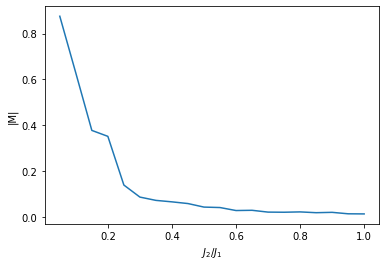

In [22]:
plt.plot(np.abs(ratios), Mag)
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel('|M|')

Text(0, 0.5, '$\\chi$')

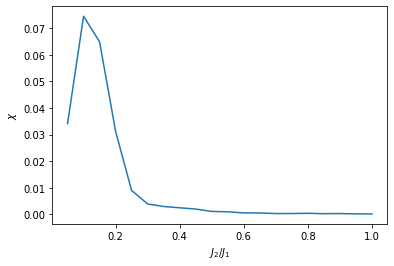

In [26]:
plt.plot(np.abs(ratios), Chi)
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel(r'$\chi$')

In [ ]:
L = 20
Lattice_Size = (L, L)
periodic = True

C_G = nx.grid_graph(dim=Lattice_Size, periodic=periodic)

for x in range(1, L-1):
    for y in range(1, L-1):
        # diagonals on right
        x1, y1 = x+1, y+1
        C_G.add_edge((x, y), (x1, y1))
        
        x1, y1 = x-1, y+1
        C_G.add_edge((x, y), (x1, y1))
        
        # diagonals on left
        x1, y1 = x+1, y-1
        C_G.add_edge((x, y), (x1, y1))
        
        x1, y1 = x-1, y-1
        C_G.add_edge((x, y), (x1, y1))

NameError: name 'nx' is not defined

In [ ]:
nx.draw(G=C_G, node_size=10)

NameError: name 'nx' is not defined